# Import necessary libraries

In [23]:
!pip install xgboost==1.7.5

   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/70.9 MB 2.6 MB/s eta 0:00:28
    --------------------------------------- 1.3/70.9 MB 2.8 MB/s eta 0:00:25
   - -------------------------------------- 1.8/70.9 MB 2.6 MB/s eta 0:00:27
   - -------------------------------------- 2.6/70.9 MB 2.8 MB/s eta 0:00:24
   - -------------------------------------- 3.4/70.9 MB 3.0 MB/s eta 0:00:23
   -- ------------------------------------- 3.9/70.9 MB 3.0 MB/s eta 0:00:23
   -- ------------------------------------- 4.7/70.9 MB 3.1 MB/s eta 0:00:22
   -- ------------------------------------- 5.2/70.9 MB 3.1 MB/s eta 0:00:22
   -- ------------------------------------- 5.2/70.9 MB 3.1 MB/s eta 0:00:22
   -- ------------------------------------- 5.2/70.9 MB 3.1 MB/s eta 0:00:22
   --- ------------------------------------ 5.8/70.9 MB 2.4 MB/s eta 0:00:27
   --- ------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

# Load the dataset


In [3]:
a1 = pd.read_excel("case_study1.xlsx")
a2 = pd.read_excel("case_study2.xlsx")

In [4]:
df1 = a1.copy()
df2 = a2.copy()

In [5]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [6]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)



df2 = df2.drop(columns_to_be_removed, axis =1)



for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [7]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [8]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [9]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


# Chi-square test

In [10]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


# VIF

In [11]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [12]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [13]:
for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1

    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.0996533816467355
3 --- 5.581352009642762
4 --- 1.9855843530987785


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.384346405965583
7 --- 3.0646584155234238
8 --- 2.898639771299253
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438
15 --- inf


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- 7.380634506427232
15 --- 1.421005001517573
16 --- 8.083255010190323
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824577
20 --- 2.6233975535272283
21 --- 2.2959970812106167
22 --- 7.360578319196446
22 --- 2.1602387773102554
23 --- 2.8686288267891467
24 --- 6.458218003637277
24 --- 2.8474118865638247
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808687
26 --- 2.3804746142952653
27 --- 8.609513476514548
27 --- 13.067550935476712
27 --- 3.500040056654654
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512924
31 --- 3.424171203217696
32 --- 10.175021454450935
32 --- 6.408710354561301
32 --- 1.0011511962625619
33 --- 3.069197305397274
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593745
35 --- 1.8331649740532172
36 -

# ANOVA

In [14]:
# check Anova for columns_to_be_kept

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [15]:
# feature selection is done for cat and num features
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [16]:
# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

df['MARITALSTATUS'].unique()
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [17]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3


# Others has to be verified by the business end user

df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3


In [18]:
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

In [19]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [20]:
df_encoded.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

# Data Preprocessing & Model-Fitting

## **1. Random Forest**

In [21]:
# 1. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469202

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.856907593778591

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



## **2. XGBoost**

In [24]:
# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.78

Class p1:
Precision: 0.8272532188841202
Recall: 0.7603550295857988
F1 Score: 0.7923946557040082

Class p2:
Precision: 0.8246241947029349
Recall: 0.9133795837462835
F1 Score: 0.8667356343459043

Class p3:
Precision: 0.4555940023068051
Recall: 0.2981132075471698
F1 Score: 0.3604014598540146

Class p4:
Precision: 0.7290448343079922
Recall: 0.7269193391642371
F1 Score: 0.7279805352798053



## **3. Decision Tree**

In [25]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.71

Class p1:
Precision: 0.7282608695652174
Recall: 0.7268244575936884
F1 Score: 0.7275419545903258

Class p2:
Precision: 0.811611143580752
Recall: 0.8257680872150645
F1 Score: 0.8186284142267636

Class p3:
Precision: 0.34372564302416214
Recall: 0.3328301886792453
F1 Score: 0.33819018404907975

Class p4:
Precision: 0.650761421319797
Recall: 0.6229348882410107
F1 Score: 0.6365441906653426





> XGBoost Accuracy : 0.78

> Random_Forest Accuracy: 0.76

> Decision_Tree Accuracy : 0.71









# Fine-Tuning the XGBoost Model

In [26]:
# xgboost is giving me best results
# We will further finetune it
# Apply standard scaler

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78
Class p1:
Precision: 0.8272532188841202
Recall: 0.7603550295857988
F1 Score: 0.7923946557040082

Class p2:
Precision: 0.8244766505636071
Recall: 0.9133795837462835
F1 Score: 0.8666541282678202

Class p3:
Precision: 0.4555940023068051
Recall: 0.2981132075471698
F1 Score: 0.3604014598540146

Class p4:
Precision: 0.7297560975609756
Recall: 0.7269193391642371
F1 Score: 0.7283349561830574



# Hyperparameter tuning in XGBoost Model

In [27]:
# No improvement in metrices



# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.779983359087127


In [28]:
# Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


# Based on risk appetite of the bank, you will suggest P1,P2,P3,P4 to the business end user


# Hyperparameter tuning for xgboost (Used in the session)

# Define the hyperparameter grid
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]
    }



In [ ]:
# Loop through each combination of hyperparameters

for colsample_bytree in param_grid['colsample_bytree']:
  for learning_rate in param_grid['learning_rate']:
    for max_depth in param_grid['max_depth']:
      for alpha in param_grid['alpha']:
          for n_estimators in param_grid['n_estimators']:

              index = index + 1

              # Define and train the XGBoost model
              model = xgb.XGBClassifier(objective='multi:softmax',
                                       num_class=4,
                                       colsample_bytree = colsample_bytree,
                                       learning_rate = learning_rate,
                                       max_depth = max_depth,
                                       alpha = alpha,
                                       n_estimators = n_estimators)



              y = df_encoded['Approved_Flag']
              x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

              label_encoder = LabelEncoder()
              y_encoded = label_encoder.fit_transform(y)


              x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


              model.fit(x_train, y_train)



              # Predict on training and testing sets
              y_pred_train = model.predict(x_train)
              y_pred_test = model.predict(x_test)


              # Calculate train and test results

              train_accuracy =  accuracy_score (y_train, y_pred_train)
              test_accuracy  =  accuracy_score (y_test , y_pred_test)



              # Include into the lists
              answers_grid ['combination']   .append(index)
              answers_grid ['train_Accuracy']    .append(train_accuracy)
              answers_grid ['test_Accuracy']     .append(test_accuracy)
              answers_grid ['colsample_bytree']   .append(colsample_bytree)
              answers_grid ['learning_rate']      .append(learning_rate)
              answers_grid ['max_depth']          .append(max_depth)
              answers_grid ['alpha']              .append(alpha)
              answers_grid ['n_estimators']       .append(n_estimators)


              # Print results for this combination
              print(f"Combination {index}")
              print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
              print(f"Train Accuracy: {train_accuracy:.2f}")
              print(f"Test Accuracy : {test_accuracy :.2f}")
              print("-" * 30)


Combination 1
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 10
Train Accuracy: 0.62
Test Accuracy : 0.62
------------------------------
Combination 2
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 3
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 100
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 4
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 10
Train Accuracy: 0.62
Test Accuracy : 0.62
------------------------------
Combination 5
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 6
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 100
Train Accuracy: 0.61
Test Accu

## **Total 720 Combinations**

In [ ]:
# Create a DataFrame from the results
results_df = pd.DataFrame(answers_grid)

# Save the DataFrame to an Excel file
results_df.to_excel('hyperparameter_results.xlsx', index=False)

In [ ]:
results_df

,combination,train_Accuracy,test_Accuracy,colsample_bytree,learning_rate,max_depth,alpha,n_estimators
0,1,0.622656,0.617616,0.1,0.001,3,1,10
1,2,0.606550,0.599667,0.1,0.001,3,1,50
2,3,0.606490,0.599667,0.1,0.001,3,1,100
3,4,0.621883,0.616902,0.1,0.001,3,10,10
4,5,0.606431,0.599667,0.1,0.001,3,10,50
...,...,...,...,...,...,...,...,...
715,716,0.937654,0.765720,0.9,1.000,10,10,50
716,717,0.964132,0.765125,0.9,1.000,10,10,100
717,718,0.783632,0.772614,0.9,1.000,10,100,10
718,719,0.788357,0.773089,0.9,1.000,10,100,50


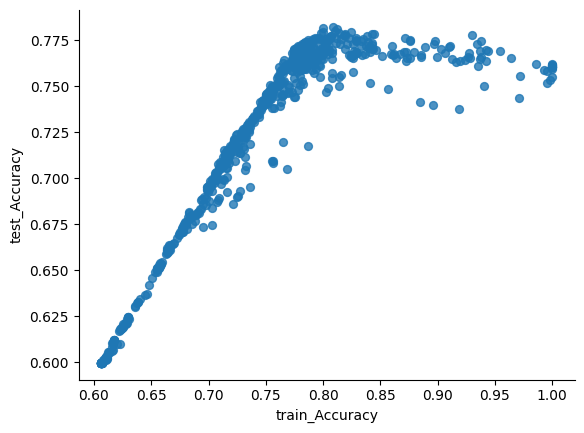

In [ ]:
# @title train_Accuracy vs test_Accuracy

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='train_Accuracy', y='test_Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=results_df)

# Get the top 10 results with the highest test accuracy


In [ ]:
top_10_results = results_df.nlargest(10, 'test_Accuracy')

top_10_results

,combination,train_Accuracy,test_Accuracy,colsample_bytree,learning_rate,max_depth,alpha,n_estimators
541,542,0.808951,0.782242,0.7,1.0,3,1,50
544,545,0.800214,0.781647,0.7,1.0,3,10,50
545,546,0.812398,0.781053,0.7,1.0,3,10,100
401,402,0.810169,0.779864,0.5,1.0,3,10,100
671,672,0.823987,0.779389,0.9,0.1,8,10,100
688,689,0.799620,0.779270,0.9,1.0,3,10,50
689,690,0.813646,0.779032,0.9,1.0,3,10,100
400,401,0.798461,0.778676,0.5,1.0,3,10,50
680,681,0.844522,0.778438,0.9,0.1,10,10,100
527,528,0.819530,0.778319,0.7,0.1,8,10,100


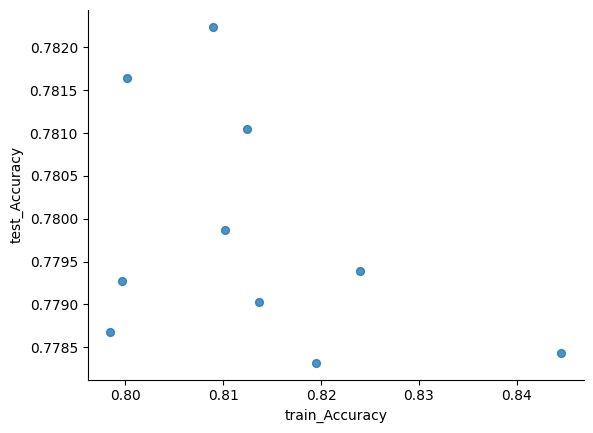

In [ ]:
# @title train_Accuracy vs test_Accuracy

from matplotlib import pyplot as plt
top_10_results.plot(kind='scatter', x='train_Accuracy', y='test_Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Get the Best-fitted Combination

In [ ]:
# Calculate the difference between train and test accuracy
results_df['difference'] = abs(results_df['train_Accuracy'] - results_df['test_Accuracy'])

In [ ]:
# Sort the results by the smallest difference
results_sorted = results_df.sort_values(by='difference')

results_sorted

,combination,train_Accuracy,test_Accuracy,colsample_bytree,learning_rate,max_depth,alpha,n_estimators,difference
473,474,0.723872,0.723404,0.7,0.010,3,10,100,0.000467
328,329,0.708448,0.707833,0.5,0.010,3,10,50,0.000615
437,438,0.713976,0.713301,0.7,0.001,3,10,100,0.000675
325,326,0.709726,0.709022,0.5,0.010,3,1,50,0.000705
470,471,0.724466,0.723761,0.7,0.010,3,1,100,0.000705
...,...,...,...,...,...,...,...,...,...
569,570,0.999970,0.760133,0.7,1.000,10,1,100,0.239837
416,417,0.999851,0.759182,0.5,1.000,8,1,100,0.240669
280,281,0.995067,0.751456,0.3,1.000,10,1,50,0.243611
272,273,0.997623,0.753596,0.3,1.000,8,1,100,0.244027


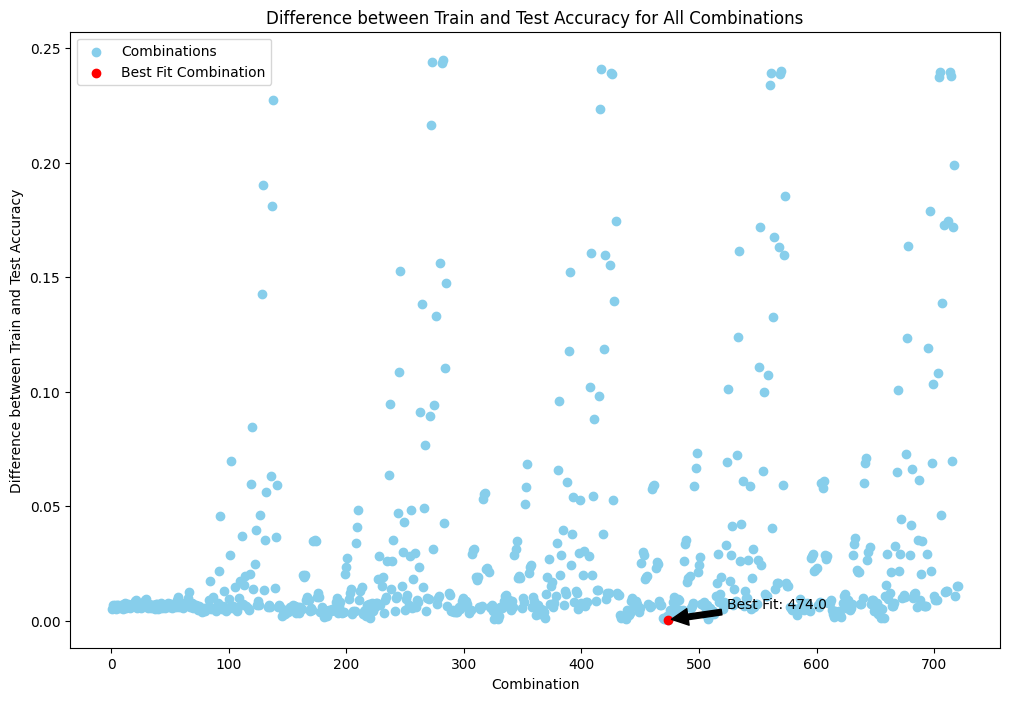

In [ ]:

# Plot all results using a scatter plot

plt.figure(figsize=(12, 8))
plt.scatter(results_sorted['combination'], results_sorted['difference'], color='skyblue', label='Combinations')
plt.xlabel('Combination')
plt.ylabel('Difference between Train and Test Accuracy')
plt.title('Difference between Train and Test Accuracy for All Combinations')

# Calculate and store the best-fit result (assuming the smallest difference is the best fit)
best_fit_result = results_sorted.iloc[0]  # Get the first row (smallest difference)

# Highlight the best-fit result
best_comb = best_fit_result['combination']
best_diff = best_fit_result['difference']
plt.scatter(best_comb, best_diff, color='red', label='Best Fit Combination')
plt.legend()

# Annotate the best-fit combination
plt.annotate(f'Best Fit: {best_comb}', xy=(best_comb, best_diff), xytext=(best_comb + 50, best_diff + 0.005),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [ ]:
# Get the best-fit result (smallest difference)
best_fit_result = results_sorted.iloc[0]

# Print the best-fit result
print(f"Best-fit Combination {best_fit_result['combination']}")
print("-"*30)
print(f"colsample_bytree: {best_fit_result['colsample_bytree']}, learning_rate: {best_fit_result['learning_rate']}, max_depth: {best_fit_result['max_depth']}, alpha: {best_fit_result['alpha']}, n_estimators: {best_fit_result['n_estimators']}")
print(f"Train Accuracy: {best_fit_result['train_Accuracy']:.2f}")
print(f"Test Accuracy : {best_fit_result['test_Accuracy']:.2f}")
print(f"Difference: {best_fit_result['difference']:.6f}")

Best-fit Combination 474.0
------------------------------
colsample_bytree: 0.7, learning_rate: 0.01, max_depth: 3.0, alpha: 10.0, n_estimators: 100.0
Train Accuracy: 0.72
Test Accuracy : 0.72
Difference: 0.000467


# Predict for Unseen Data

In [ ]:
a3 = pd.read_excel("Unseen_Dataset.xlsx")

cols_in_df = list(df.columns)
cols_in_df.pop(42)

df_unseen = a3[cols_in_df]

df_unseen['MARITALSTATUS'].unique()
df_unseen['EDUCATION'].unique()
df_unseen['GENDER'].unique()
df_unseen['last_prod_enq2'].unique()
df_unseen['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [ ]:
df.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS',
       'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2',
       'Approved_Flag'],
      dtype='object')

In [ ]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3


# Others has to be verified by the business end user

df_unseen.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df_unseen.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df_unseen.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df_unseen.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df_unseen.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df_unseen.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df_unseen.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3


In [ ]:
df_unseen['EDUCATION'].value_counts()
df_unseen['EDUCATION'] = df['EDUCATION'].astype(int)
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            100 non-null    float64
 1   pct_tl_closed_L6M          100 non-null    float64
 2   Tot_TL_closed_L12M         100 non-null    int64  
 3   pct_tl_closed_L12M         100 non-null    float64
 4   Tot_Missed_Pmnt            100 non-null    int64  
 5   CC_TL                      100 non-null    int64  
 6   Home_TL                    100 non-null    int64  
 7   PL_TL                      100 non-null    int64  
 8   Secured_TL                 100 non-null    int64  
 9   Unsecured_TL               100 non-null    int64  
 10  Other_TL                   100 non-null    int64  
 11  Age_Oldest_TL              100 non-null    int64  
 12  Age_Newest_TL              100 non-null    int64  
 13  time_since_recent_payment  100 non-null    int64  


In [ ]:
df_encoded_unseen = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [ ]:
df_encoded_unseen.info()
k1 = df_encoded_unseen.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [ ]:
model =xgb.XGBClassifier(objective='multi:softmax',
                         num_class=4,
                         colsample_bytree=0.9,
                         learning_rate = 1,
                         max_depth = 3,
                         alpha = 10,
                         n_estimators = 100)

model.fit(x_train, y_train)

# Assuming 'a4' should correspond to the data used for prediction
a4 = df_encoded_unseen.copy()  # Create a copy to avoid modifying the original

# Now predict
y_pred_unseen = model.predict(a4)

a4['Target_variable'] = y_pred_unseen


In [ ]:
a4.to_excel('Final_Predictions.xlsx', index=False)

In [ ]:
#print runtime
import time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total run time of the program- " + str(round(elapsed_time, 2)) + ' sec')

input('Press Enter to exit...')

NameError: name 'start_time' is not defined